In [8]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
import matplotlib.path as mpath
from matplotlib import gridspec

# additional configuration (optional)
%config InlineBackend.figure_format = 'retina'

from dask.distributed import Client #client is the interface to
from dask.distributed import LocalCluster #Start the cluster locally
cluster = LocalCluster()
client = Client(cluster)
client

/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxesmf/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44960 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:45120 Dashboard: http://127.0.0.1:44960/status,Cluster Workers: 4 Cores: 8 Memory: 33.22 GB


In [2]:
######### Load static and t_ref output for control and each ensemble member for the experiments:
######### Will need to dmget all files!

ds_static = xr.open_dataset('/net/rlb/subtropical_gyres/mode_water/ocean_monthly.static.nc')

ds_sat_control = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/piControl_output/atmos_level.0251-0405.t_ref.nc',
                    chunks={'time':1},drop_variables=['average_DT', 'average_T1', 'average_T2']) 

### fafantwater members
ds_sat_fafantwater_251 = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/annual/5yr/*t_ref.nc',
                    chunks={'time':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],combine='by_coords')
ds_sat_fafantwater_290 = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_290/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/annual/5yr/*t_ref.nc',
                    chunks={'time':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],combine='by_coords')
ds_sat_fafantwater_332 = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_332/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/annual/5yr/*t_ref.nc',
                    chunks={'time':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],combine='by_coords')


### fafantwaterstress members
ds_sat_fafantwaterstress_251 = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwaterstress/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/annual/5yr/*t_ref.nc',
                    chunks={'time':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],combine='by_coords')
ds_sat_fafantwaterstress_290 = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwaterstress_290/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/annual/5yr/*t_ref.nc',
                    chunks={'time':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],combine='by_coords')
ds_sat_fafantwaterstress_332 = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwaterstress_332/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/annual/5yr/*t_ref.nc',
                    chunks={'time':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],combine='by_coords')


### fafstress members
ds_sat_fafstress_251 = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafstress/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/annual/5yr/*t_ref.nc',
                    chunks={'time':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],combine='by_coords')
ds_sat_fafstress_290 = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafstress_290/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/annual/5yr/*t_ref.nc',
                    chunks={'time':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],combine='by_coords')
ds_sat_fafstress_332 = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafstress_332/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/annual/5yr/*t_ref.nc',
                    chunks={'time':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],combine='by_coords')



In [3]:
##### ANTWATER ENSEMBLE AVERAGE
fafantwater_ensemble = xr.concat([ds_sat_fafantwater_251,ds_sat_fafantwater_290,ds_sat_fafantwater_332],dim='member')
fafantwater_ensemble_mean = fafantwater_ensemble.t_ref.mean(dim='member')

fafantwater_ensemble_mean_5170_slice = fafantwater_ensemble_mean.sel(time=slice('0051-07-02','0070-07-02'))
fafantwater_ensemble_mean_5170_average = fafantwater_ensemble_mean_5170_slice.mean(dim='time')
fafantwater_ensemble_mean_5170_average


##### ANTWATER-STRESS ENSEMBLE AVERAGE
fafantwaterstress_ensemble = xr.concat([ds_sat_fafantwaterstress_251,ds_sat_fafantwaterstress_290,ds_sat_fafantwaterstress_332],dim='member')
fafantwaterstress_ensemble_mean = fafantwaterstress_ensemble.t_ref.mean(dim='member')

fafantwaterstress_ensemble_mean_5170_slice = fafantwaterstress_ensemble_mean.sel(time=slice('0051-07-02','0070-07-02'))
fafantwaterstress_ensemble_mean_5170_average = fafantwaterstress_ensemble_mean_5170_slice.mean(dim='time')
fafantwaterstress_ensemble_mean_5170_average


##### STRESS ENSEMBLE AVERAGE
fafstress_ensemble = xr.concat([ds_sat_fafstress_251,ds_sat_fafstress_290,ds_sat_fafstress_332],dim='member')
fafstress_ensemble_mean = fafstress_ensemble.t_ref.mean(dim='member')

fafstress_ensemble_mean_5170_slice = fafstress_ensemble_mean.sel(time=slice('0051-07-02','0070-07-02'))
fafstress_ensemble_mean_5170_average = fafstress_ensemble_mean_5170_slice.mean(dim='time')
fafstress_ensemble_mean_5170_average


##### PICONTROl 100-yr AVE:
piControl_100yr_ave = ds_sat_control.t_ref.sel(time=slice('0281-07-02','0380-07-02')).mean(dim='time')


##### COMPUTE DIFFERENCES BETWEEN EXPS AND PICONTROL
difference_antwater = fafantwater_ensemble_mean_5170_average - piControl_100yr_ave
difference_antwaterstress = fafantwaterstress_ensemble_mean_5170_average - piControl_100yr_ave
difference_stress = fafstress_ensemble_mean_5170_average - piControl_100yr_ave

In [4]:
## To compute SAT metrics, we need to compute the area-weighted average SAT.
## This function computes the atmospheric grid cell area. It accepts
## any numpy array with separate 1-d arrays defining the cell centers.

import warnings 

def standard_grid_cell_area(lat, lon, rE=6371.0e3):
    """ computes the cell area for a standard spherical grid """

    warnings.warn(
        "standard_grid_cell_area is deprecated, use compute_area_regular_grid",
        DeprecationWarning,
    )

    dLat = lat[1] - lat[0]
    dLon = lon[1] - lon[0]
    area = np.empty((len(lat), len(lon)))
    for j in range(0, len(lat)):
        for i in range(0, len(lon)):
            lon1 = lon[i] + dLon / 2
            lon0 = lon[i] - dLon / 2
            lat1 = lat[j] + dLat / 2
            lat0 = lat[j] - dLat / 2
            area[j, i] = (
                (np.pi / 180.0)
                * rE
                * rE
                * np.abs(np.sin(np.radians(lat0)) - np.sin(np.radians(lat1)))
                * np.abs(lon0 - lon1)
            )
    return area

In [5]:
## Compute atmospheric grid cell area
lat_atmos =  ds_sat_control.coords['lat'].values      #1-D numpy array of lat
lon_atmos =  ds_sat_control.coords['lon'].values      #1-D numpy array of lon

areacella = standard_grid_cell_area(lat_atmos,lon_atmos)  #Pass these arrays to the standard_grid_cell_area function

## Convert the areacella numpy array to a xarray DataArray:
areacella_xarray = xr.DataArray(areacella,dims=(ds_sat_control.t_ref.dims[1],\
                                                ds_sat_control.t_ref.dims[2]),\
                                                coords=(ds_sat_control.t_ref.coords['lat'],\
                                                        ds_sat_control.t_ref.coords['lon']))

<ipython-input-4-a305263a9c31>:10: DeprecationWarning: standard_grid_cell_area is deprecated, use compute_area_regular_grid
  warnings.warn(


In [13]:
### Compute the areaweighted SAT for global SAT and for subpolar Southern Ocean (>55S):
#### Area weighted SAT
sat_antwater_aw = fafantwater_ensemble_mean_5170_average*areacella_xarray
sat_antwaterstress_aw = fafantwaterstress_ensemble_mean_5170_average*areacella_xarray
sat_stress_aw = fafstress_ensemble_mean_5170_average*areacella_xarray
sat_piControl_aw = piControl_100yr_ave*areacella_xarray

#### Denominators
denom_global = areacella_xarray.sum(dim=('lat','lon'))
denom_gt_55 = areacella_xarray.sel(lat=slice(-90,-55)).sum(dim=('lat','lon'))

#### Numerators
num_antwater_global = sat_antwater_aw.sum(dim=('lat','lon'))
num_antwaterstress_global = sat_antwaterstress_aw.sum(dim=('lat','lon'))
num_stress_global = sat_stress_aw.sum(dim=('lat','lon'))
num_piControl_global = sat_piControl_aw.sum(dim=('lat','lon'))

num_antwater_gt_55 = sat_antwater_aw.sel(lat=slice(-90,-55)).sum(dim=('lat','lon'))
num_antwaterstress_gt_55 = sat_antwaterstress_aw.sel(lat=slice(-90,-55)).sum(dim=('lat','lon'))
num_stress_gt_55 = sat_stress_aw.sel(lat=slice(-90,-55)).sum(dim=('lat','lon'))
num_piControl_gt_55 = sat_piControl_aw.sel(lat=slice(-90,-55)).sum(dim=('lat','lon'))

#### Compute
sat_antwater_globalmean = (num_antwater_global / denom_global) - 273.15
sat_antwaterstress_globalmean = (num_antwaterstress_global / denom_global) - 273.15
sat_stress_globalmean = (num_stress_global / denom_global) - 273.15

sat_antwater_gt55 = (num_antwater_gt_55 / denom_gt_55) - 273.15
sat_antwaterstress_gt55 = (num_antwaterstress_gt_55 / denom_gt_55) - 273.15
sat_stress_gt55 = (num_stress_gt_55 / denom_gt_55) - 273.15

sat_piControl_globalmean = (num_piControl_global / denom_global) - 273.15
sat_piControl_gt55 = (num_piControl_gt_55 / denom_gt_55) - 273.15

In [14]:
### Compute differences and list:
sat_antwater_globalmean_diff = sat_antwater_globalmean - sat_piControl_globalmean
sat_antwaterstress_globalmean_diff = sat_antwaterstress_globalmean - sat_piControl_globalmean                                  
sat_stress_globalmean_diff = sat_stress_globalmean - sat_piControl_globalmean 

sat_antwater_gt55_diff = sat_antwater_gt55 - sat_piControl_gt55
sat_antwaterstress_gt55_diff = sat_antwaterstress_gt55 - sat_piControl_gt55                                 
sat_stress_gt55_diff = sat_stress_gt55 - sat_piControl_gt55


## global
#sat_antwater_globalmean_diff.values,\
#sat_antwaterstress_globalmean_diff.values,\
#sat_stress_globalmean_diff.values, 

## subpolar
sat_antwater_gt55_diff.values,\
sat_antwaterstress_gt55_diff.values,\
sat_stress_gt55_diff.values 

(array(-1.49565601), array(-0.56666504), array(0.81357191))

In [6]:
## Function to set up Antarctic polar projection:
### Antarctic map for plotting:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

depth = ds_static['deptho']
depth

shelf = depth.where(depth<1000)*0
shelf_mask = shelf.isin(0)

import matplotlib.ticker as mticker

def antarctic_map(ax, grid):
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_extent([-180, 180, -90, -55], ccrs.PlateCarree())
    ax.contour(ds_static.xh,ds_static.yh,shelf_mask,colors='black',linewidths = 0.5,transform=ccrs.PlateCarree())
    if grid == True:
        gl = ax.gridlines(linewidth = 1, color = 'grey', linestyle = '--')
        gl.ylocator = mticker.FixedLocator([-90, -80, -70, -60, -50])

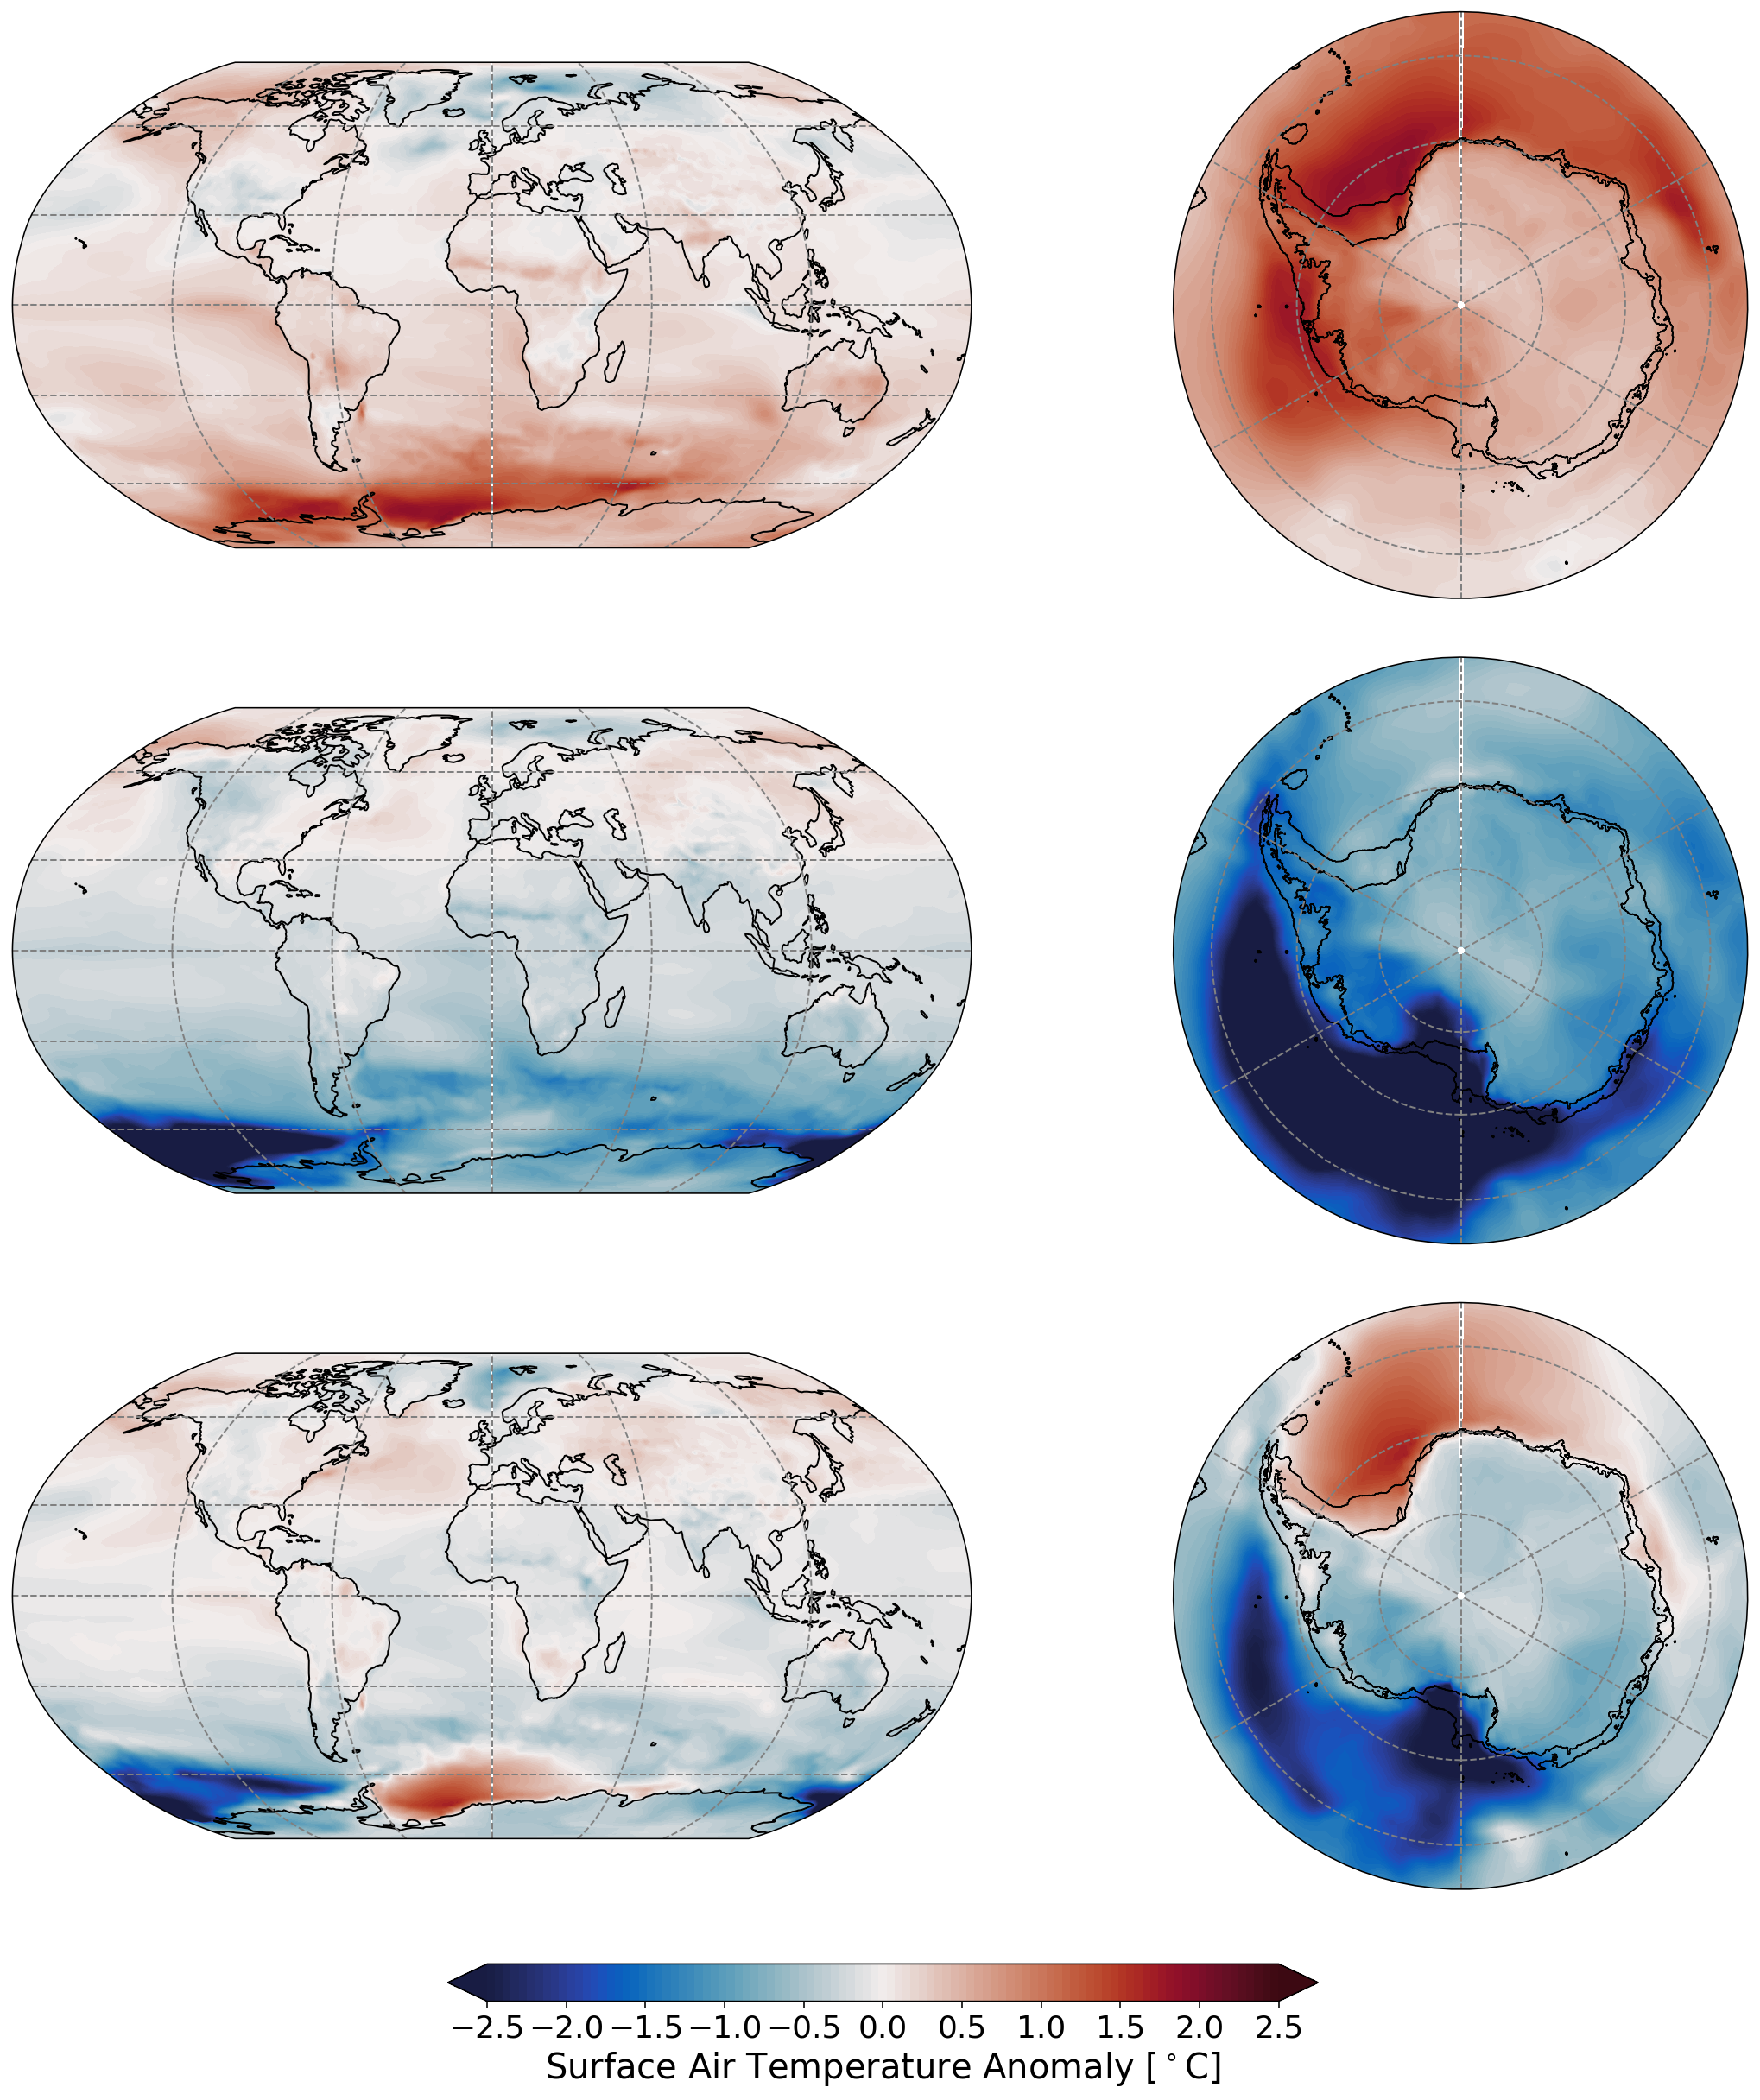

In [16]:
## Plot SAT global 
from matplotlib import gridspec

fig, ax  = plt.subplots(3,2, figsize = (20,20))
gs = gridspec.GridSpec(3,2)

ax0, ax1, ax2, ax3, ax4, ax5 = plt.subplot(gs[0,0],projection=ccrs.Robinson()),plt.subplot(gs[0,1],projection=ccrs.SouthPolarStereo()),\
                               plt.subplot(gs[1,0],projection=ccrs.Robinson()),plt.subplot(gs[1,1],projection=ccrs.SouthPolarStereo()),\
                               plt.subplot(gs[2,0],projection=ccrs.Robinson()),plt.subplot(gs[2,1],projection=ccrs.SouthPolarStereo()),\

gs.update(hspace = 0.1, wspace = 0.01)                                           

lon_sat_cm4 = ds_sat_control.lon.values
lat_sat_cm4 = ds_sat_control.lat.values
x_sat_cm4,y_sat_cm4 = np.meshgrid(lon_sat_cm4,lat_sat_cm4)

levels_sat_diff = np.linspace(-2.5,2.5,100)

## Global maps
ax0.contourf(x_sat_cm4,y_sat_cm4,difference_stress.values,cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(),levels=levels_sat_diff,extend='both')
ax2.contourf(x_sat_cm4,y_sat_cm4,difference_antwater.values,cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(),levels=levels_sat_diff,extend='both')
ax4.contourf(x_sat_cm4,y_sat_cm4,difference_antwaterstress.values,cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(),levels=levels_sat_diff,extend='both')

g1 = ax0.gridlines(linewidth = 1, color = 'grey', linestyle = '--')
g1 = ax2.gridlines(linewidth = 1, color = 'grey', linestyle = '--')
g1 = ax4.gridlines(linewidth = 1, color = 'grey', linestyle = '--')

ax0.coastlines()
ax2.coastlines()
ax4.coastlines()


## Polar Projections
antarctic_map(ax1, grid = True)
antarctic_map(ax3, grid = True)
antarctic_map(ax5, grid = True)

ax1.contourf(x_sat_cm4,y_sat_cm4,difference_stress.values,cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(),levels=levels_sat_diff,extend='both')
ax3.contourf(x_sat_cm4,y_sat_cm4,difference_antwater.values,cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(),levels=levels_sat_diff,extend='both')
ax5.contourf(x_sat_cm4,y_sat_cm4,difference_antwaterstress.values,cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(),levels=levels_sat_diff,extend='both')


## Add Horizontal color bars at bottom:
cbr_sat_diff = ax0.contourf(x_sat_cm4,y_sat_cm4,difference_stress.values,cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(),levels=levels_sat_diff,extend='both')
cax = fig.add_axes([0.30, 0.08, 0.35, 0.015])

cbar_1=plt.colorbar(cbr_sat_diff,cax=cax,orientation='horizontal',shrink=0.5,ticks = [-2.5,-2.0,-1.5,-1.0,-0.5,0,0.5,1.0,1.5,2.0,2.5])
cbar_1.ax.tick_params(labelsize=18)
cbar_1.set_label('Surface Air Temperature Anomaly [$^\circ$C]', fontsize=20)


plt.savefig('CM4_ensemble_mean_SAT.pdf')

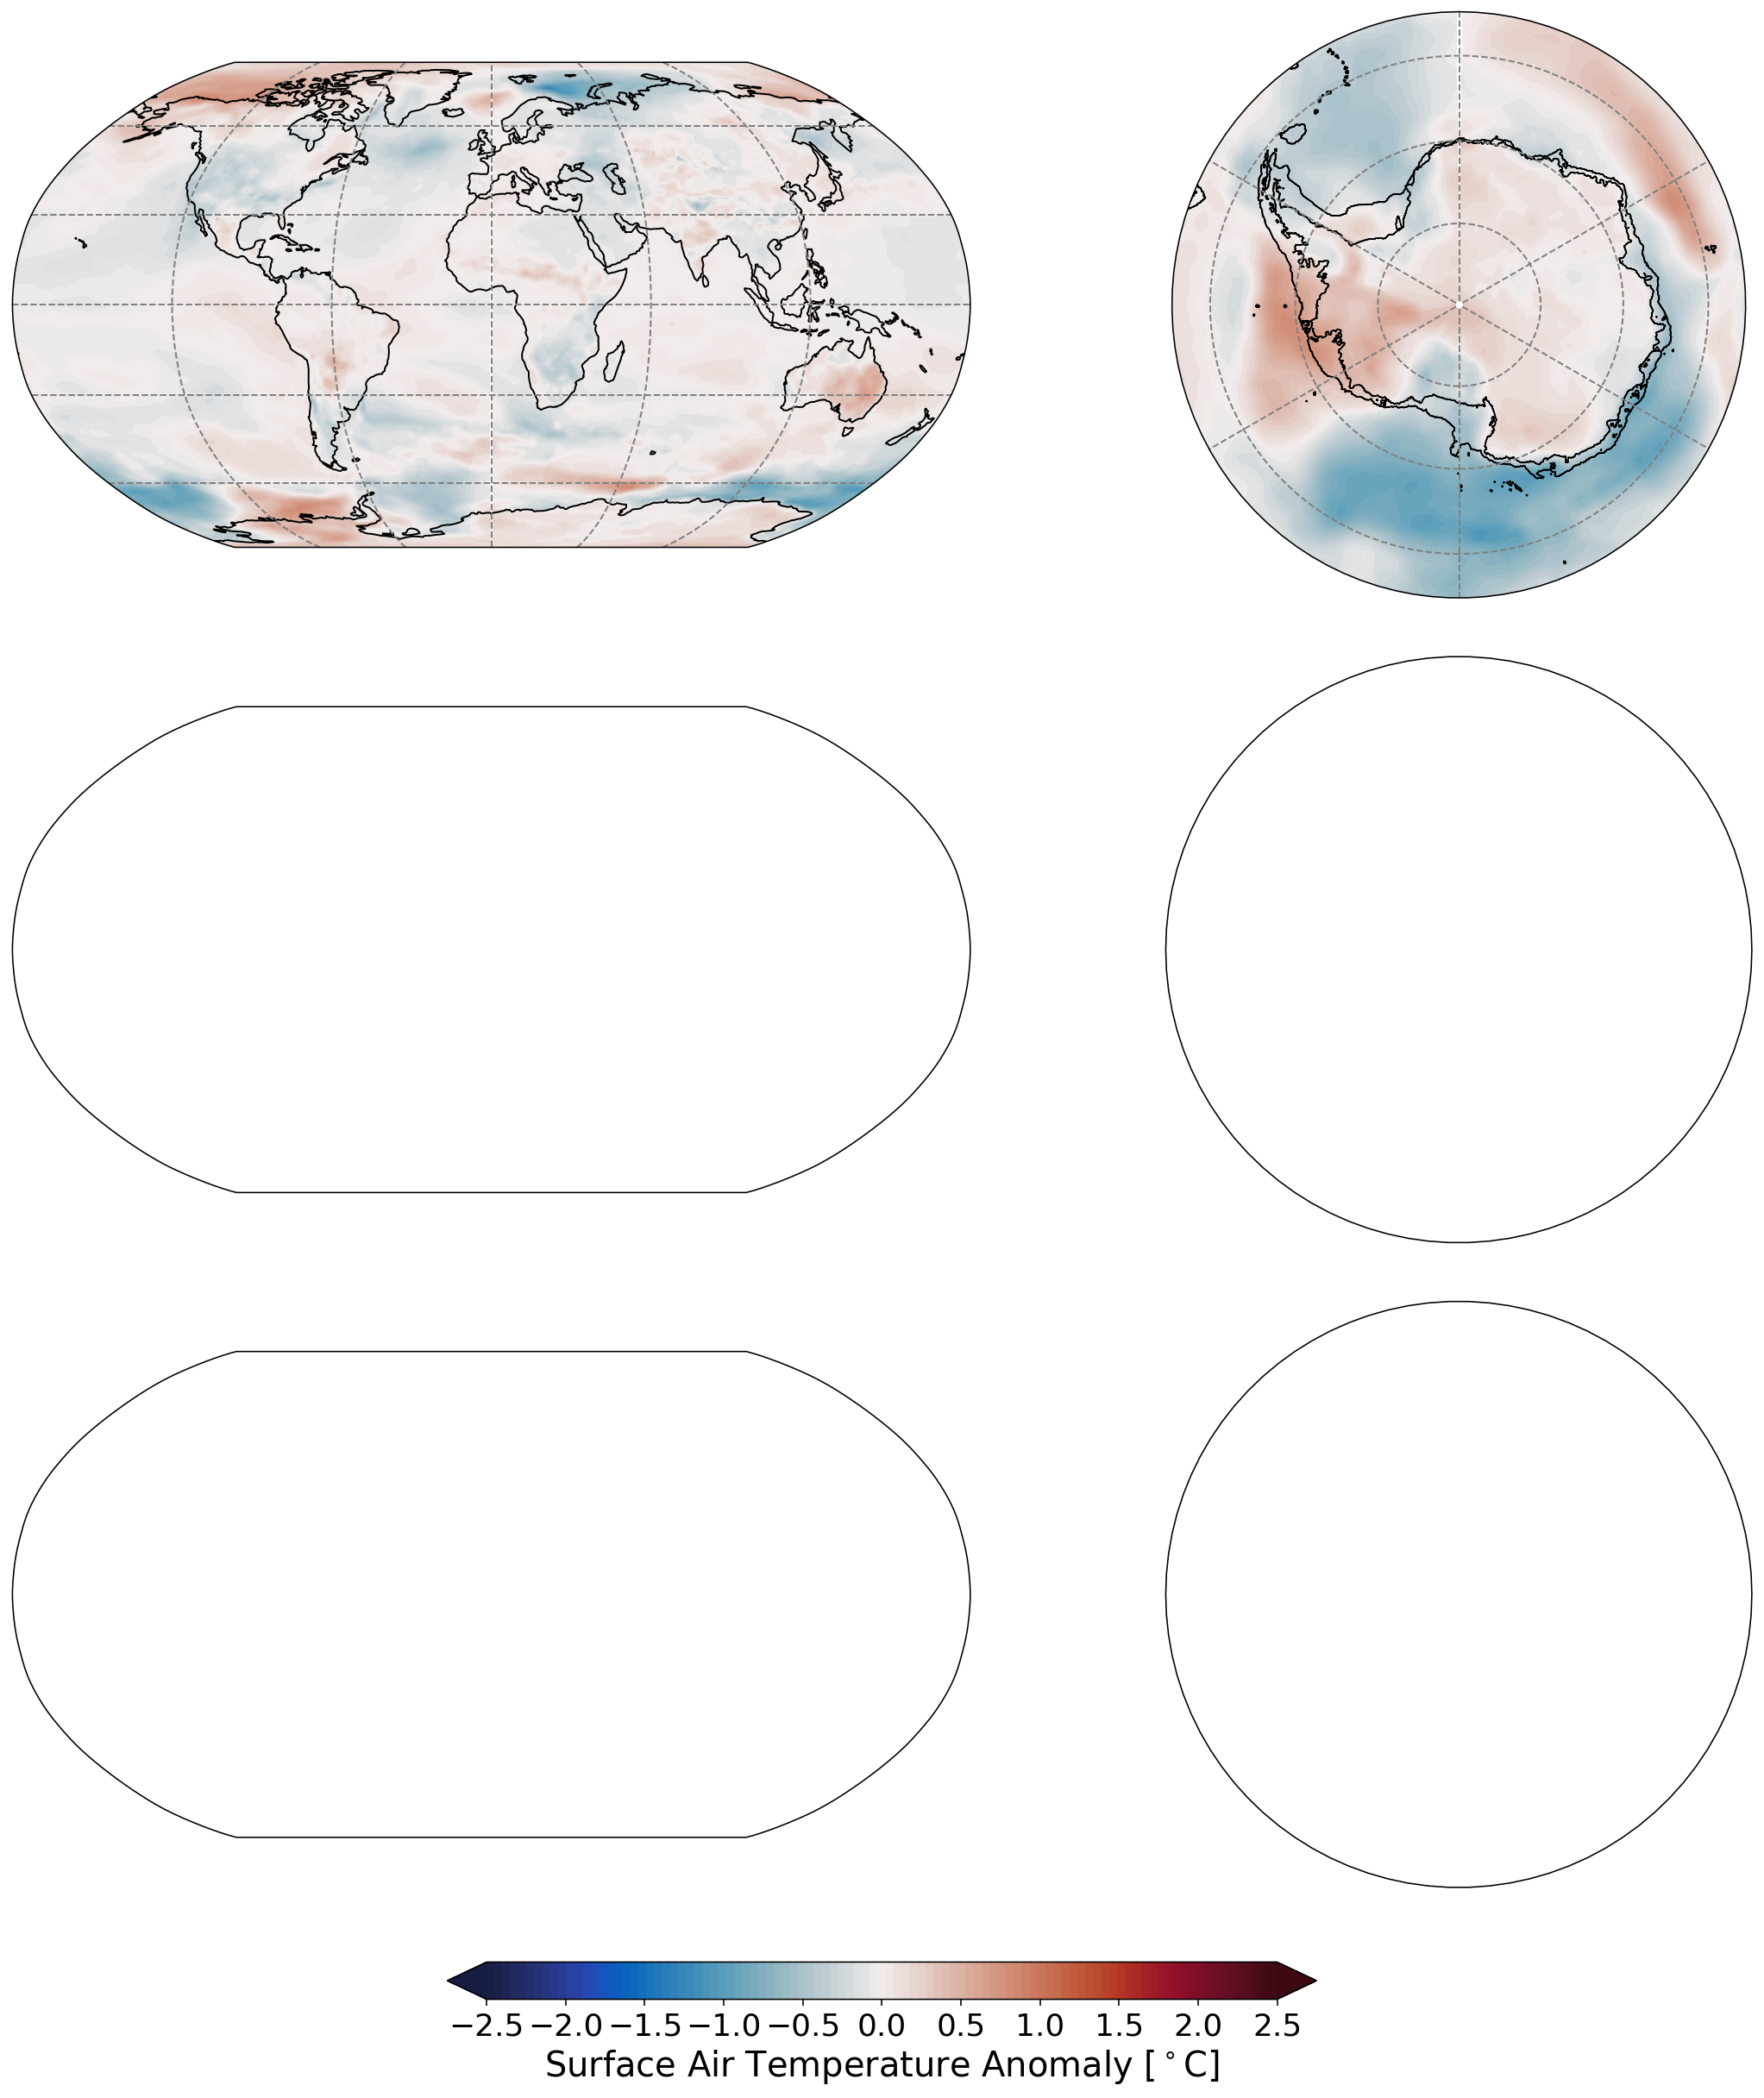

In [11]:
## Test to see if Antwater-Stress response is a linear combo of Antwater + Stress:
total_ens = difference_antwater + difference_stress
difference_ens = total_ens - difference_antwaterstress

from matplotlib import gridspec

fig, ax  = plt.subplots(3,2, figsize = (20,20))
gs = gridspec.GridSpec(3,2)

ax0, ax1, ax2, ax3, ax4, ax5 = plt.subplot(gs[0,0],projection=ccrs.Robinson()),plt.subplot(gs[0,1],projection=ccrs.SouthPolarStereo()),\
                               plt.subplot(gs[1,0],projection=ccrs.Robinson()),plt.subplot(gs[1,1],projection=ccrs.SouthPolarStereo()),\
                               plt.subplot(gs[2,0],projection=ccrs.Robinson()),plt.subplot(gs[2,1],projection=ccrs.SouthPolarStereo()),\

gs.update(hspace = 0.1, wspace = 0.01)                                           

lon_sat_cm4 = ds_sat_control.lon.values
lat_sat_cm4 = ds_sat_control.lat.values
x_sat_cm4,y_sat_cm4 = np.meshgrid(lon_sat_cm4,lat_sat_cm4)                                      

lon_sat_cm4 = ds_sat_control.lon.values
lat_sat_cm4 = ds_sat_control.lat.values
x_sat_cm4,y_sat_cm4 = np.meshgrid(lon_sat_cm4,lat_sat_cm4)

levels_sat_diff = np.linspace(-2.5,2.5,100)

## Global maps
ax0.contourf(x_sat_cm4,y_sat_cm4,difference_ens.values,cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(),levels=levels_sat_diff,extend='both')
g1 = ax0.gridlines(linewidth = 1, color = 'grey', linestyle = '--')
ax0.coastlines()

## Polar Projections
antarctic_map(ax1, grid = True)
ax1.contourf(x_sat_cm4,y_sat_cm4,difference_ens.values,cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(),levels=levels_sat_diff,extend='both')

## Add Horizontal color bars at bottom:
cbr_sat_diff = ax0.contourf(x_sat_cm4,y_sat_cm4,difference_ens.values,cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(),levels=levels_sat_diff,extend='both')
cax = fig.add_axes([0.30, 0.08, 0.35, 0.015])

cbar_1=plt.colorbar(cbr_sat_diff,cax=cax,orientation='horizontal',shrink=0.5,ticks = [-2.5,-2.0,-1.5,-1.0,-0.5,0,0.5,1.0,1.5,2.0,2.5])
cbar_1.ax.tick_params(labelsize=18)
cbar_1.set_label('Surface Air Temperature Anomaly [$^\circ$C]', fontsize=20)


plt.savefig('CM4_ensemble_mean_AntwaterStress_vs_AntwaterplusStress.pdf')

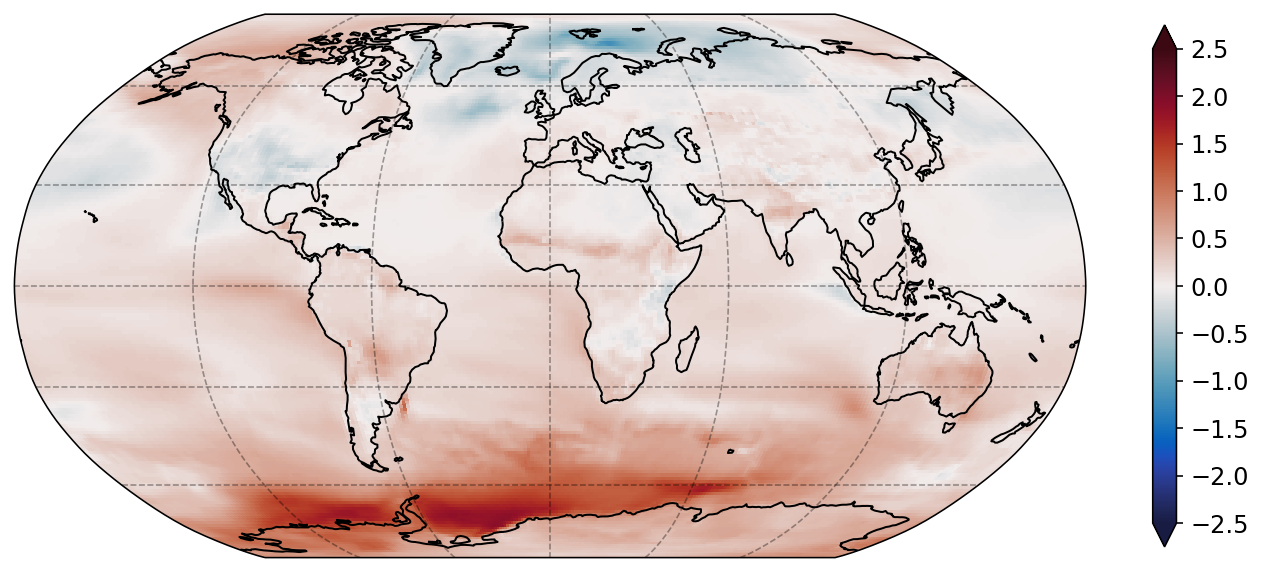

In [37]:
## Plotting using xarray

subplot_kws=dict(projection=ccrs.Robinson(),
                 )

plt.figure(figsize=[12,8])

p = difference_stress.plot(vmin=-2.5,vmax=2.5,
              cmap=cmocean.cm.balance,
              subplot_kws=subplot_kws,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

p.axes.gridlines(color='black', alpha=0.2, linestyle='--')
p.axes.gridlines(color='black', alpha=0.2, linestyle='--')
p.axes.coastlines()

# add a seperate colorbar
cb = plt.colorbar(p, ticks=[-2.5,-2,-1.5,-1.0,-0.5,0,0.5,1.0,1.5,2.0,2.5],shrink=0.6,extend='both')
cb.ax.tick_params(labelsize=12)

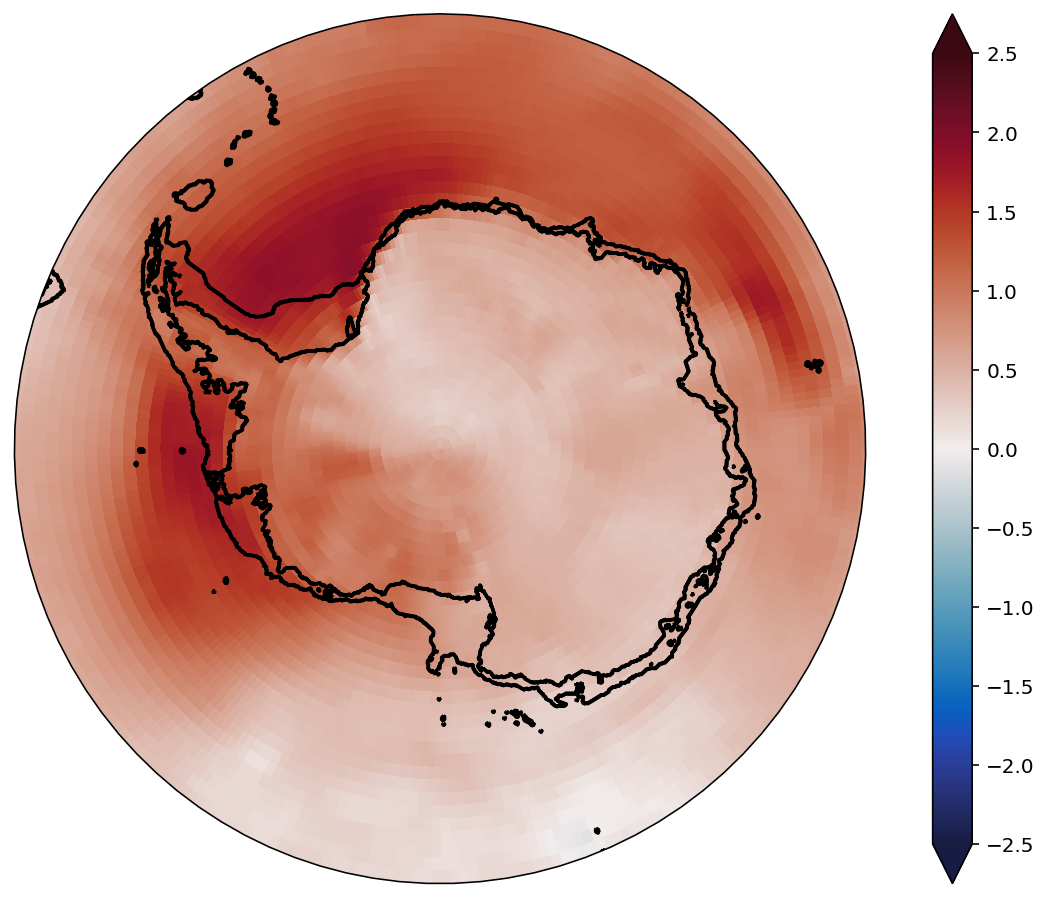

In [38]:
## plotting using xarray

depth = ds_static['deptho']
depth

shelf = depth.where(depth<1000)*0
shelf_mask = shelf.isin(0)

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

subplot_kws=dict(facecolor='grey')

plt.figure(figsize=[12,8])

projection=ccrs.SouthPolarStereo()
ax = plt.axes(projection=projection)
ax.set_extent([-180,180,-90,-55], ccrs.PlateCarree())
ax.set_boundary(circle,transform=ax.transAxes)

p = difference_stress.plot(x='lon', y='lat',
                        vmin=-2.5,vmax=2.5,
                        cmap=cmocean.cm.balance,
                        transform=ccrs.PlateCarree(),add_colorbar=False)

shelf_mask.plot.contour(x='xh', y='yh',transform=ccrs.PlateCarree(),colors='black')

cb = plt.colorbar(p, ticks=[-2.5,-2,-1.5,-1.0,-0.5,0,0.5,1.0,1.5,2.0,2.5],extend='both')